In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 예시 파일 경로
def plt_sample(file_path):

    # pandas를 사용하여 압축된 csv 파일을 읽어오기
    df = pd.read_csv(file_path, compression='gzip')

    # DataFrame을 numpy 배열로 변환
    data = df.to_numpy()
    plt.figure(figsize=(3,3))
    print(data.shape, data.min(),data.max(),np.unique(data))
    plt.imshow(data)
    plt.show()
    

(820, 821) 3.70608e-08 4.15363e-07 [3.70608e-08 3.70673e-08 3.70676e-08 ... 4.13989e-07 4.13999e-07
 4.15363e-07]


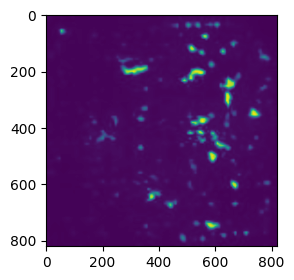

In [16]:
file_path = r'./data\BeGAN-circuit-benchmarks\nangate45\set1\data\BeGAN_0000_current.csv.gz'
plt_sample(file_path)


(820, 821) 0.0 14.7857 [ 0.        0.882862  0.883059 ... 14.7586   14.7597   14.7857  ]


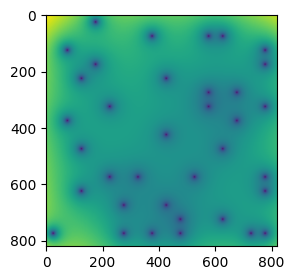

In [17]:
file_path = r'./data\BeGAN-circuit-benchmarks\nangate45\set1\data\BeGAN_0000_eff_dist.csv.gz'
plt_sample(file_path)


(820, 821) 0.000371715 0.0026118 [0.00037172 0.00037225 0.00037274 ... 0.00260829 0.00260858 0.0026118 ]


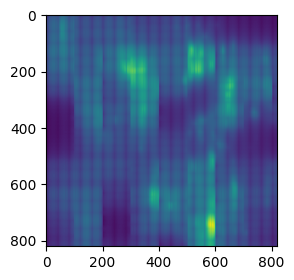

In [18]:
file_path = r'./data\BeGAN-circuit-benchmarks\nangate45\set1\data\BeGAN_0000_ir_drop.csv.gz'
plt_sample(file_path)


(820, 821) 0.0 3.0 [0. 1. 2. 3.]


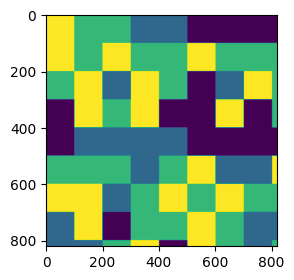

In [19]:
file_path = r'./data\BeGAN-circuit-benchmarks\nangate45\set1\data\BeGAN_0000_pdn_density.csv.gz'
plt_sample(file_path)


In [27]:
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset
import glob

class CustomDataset(Dataset):
    def __init__(self, root_path):
        self.data_files = self._find_files(root_path)

    def _find_files(self, root_path):
        data_files = []

        current_files = glob.glob(os.path.join(root_path, '*_current.csv.gz'))
        eff_dist_files = glob.glob(os.path.join(root_path, '*_eff_dist.csv.gz'))
        pdn_density_files = glob.glob(os.path.join(root_path, '*_pdn_density.csv.gz'))
        ir_drop_files = glob.glob(os.path.join(root_path, '*_ir_drop.csv.gz'))

        current_files.sort()
        eff_dist_files.sort()
        pdn_density_files.sort()
        ir_drop_files.sort()

        for current, eff_dist, pdn_density, ir_drop in zip(current_files, eff_dist_files, pdn_density_files, ir_drop_files):
            data_files.append({
                'current': current,
                'eff_dist': eff_dist,
                'pdn_density': pdn_density,
                'ir_drop': ir_drop
            })

        return data_files

    def __len__(self):
        return len(self.data_files)

    def __getitem__(self, idx):
        file_group = self.data_files[idx]

        current = pd.read_csv(file_group['current'], compression='gzip').to_numpy()
        eff_dist = pd.read_csv(file_group['eff_dist'], compression='gzip').to_numpy()
        pdn_density = pd.read_csv(file_group['pdn_density'], compression='gzip').to_numpy()
        ir_drop = pd.read_csv(file_group['ir_drop'], compression='gzip').to_numpy()

        input_data = {
            'current': torch.tensor(current, dtype=torch.float32),
            'eff_dist': torch.tensor(eff_dist, dtype=torch.float32),
            'pdn_density': torch.tensor(pdn_density, dtype=torch.float32)
        }

        target = torch.tensor(ir_drop, dtype=torch.float32)

        return input_data, target
    

root_path = r'F:\NowWorking\Job_IR\data\BeGAN-circuit-benchmarks\nangate45\set1\data'

# 커스텀 데이터셋 초기화
dataset = CustomDataset(root_path)

# 첫 번째 아이템 가져오기
input_data, target = dataset[0]

print(input_data['current'].shape)
print(input_data['eff_dist'].shape)
print(input_data['pdn_density'].shape)
print(target.shape)

torch.Size([820, 821])
torch.Size([820, 821])
torch.Size([820, 821])
torch.Size([820, 821])


In [29]:
import os
import pandas as pd
import numpy as np
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset
import glob

class CustomDataset(Dataset):
    def __init__(self, root_path):
        self.data_files = self._find_files(root_path)

    def _find_files(self, root_path):
        data_files = []

        current_files = glob.glob(os.path.join(root_path, '*_current.csv.gz'))
        eff_dist_files = glob.glob(os.path.join(root_path, '*_eff_dist.csv.gz'))
        pdn_density_files = glob.glob(os.path.join(root_path, '*_pdn_density.csv.gz'))
        ir_drop_files = glob.glob(os.path.join(root_path, '*_ir_drop.csv.gz'))

        current_files.sort()
        eff_dist_files.sort()
        pdn_density_files.sort()
        ir_drop_files.sort()

        for current, eff_dist, pdn_density, ir_drop in zip(current_files, eff_dist_files, pdn_density_files, ir_drop_files):
            data_files.append({
                'current': current,
                'eff_dist': eff_dist,
                'pdn_density': pdn_density,
                'ir_drop': ir_drop
            })

        return data_files

    def __len__(self):
        return len(self.data_files)

    def __getitem__(self, idx):
        file_group = self.data_files[idx]

        current = pd.read_csv(file_group['current'], compression='gzip').to_numpy()
        eff_dist = pd.read_csv(file_group['eff_dist'], compression='gzip').to_numpy()
        pdn_density = pd.read_csv(file_group['pdn_density'], compression='gzip').to_numpy()
        ir_drop = pd.read_csv(file_group['ir_drop'], compression='gzip').to_numpy()

        input_data = {
            'current': torch.tensor(current, dtype=torch.float32),
            'eff_dist': torch.tensor(eff_dist, dtype=torch.float32),
            'pdn_density': torch.tensor(pdn_density, dtype=torch.float32)
        }

        target = torch.tensor(ir_drop, dtype=torch.float32)

        return input_data, target


def split_dataset(dataset, train_ratio=0.7, valid_ratio=0.15, test_ratio=0.15, random_state=42):
    assert np.isclose(train_ratio + valid_ratio + test_ratio, 1.0), " 1.0"
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    
    train_valid_size = int((train_ratio + valid_ratio) * dataset_size)
    train_valid_indices, test_indices = train_test_split(indices, train_size=train_valid_size, random_state=random_state)
    
    train_size = int(train_ratio * dataset_size)
    train_indices, valid_indices = train_test_split(train_valid_indices, train_size=train_size, random_state=random_state)
    
    train_dataset = Subset(dataset, train_indices)
    valid_dataset = Subset(dataset, valid_indices)
    test_dataset = Subset(dataset, test_indices)
    
    return train_dataset, valid_dataset, test_dataset

def build_dataset(root_path=r'F:\NowWorking\Job_IR\data\BeGAN-circuit-benchmarks\nangate45\set1\data'):
    dataset = CustomDataset(root_path)
    return split_dataset(dataset)


In [30]:
trainset,valset, testset = build_dataset()

In [33]:
trainset.__len__(),valset.__len__(),testset.__len__()


(700, 150, 150)

In [2]:
import os
os.chdir('/workspace')
from models.ce_fpn_model import IRdropModel

In [3]:
import torch
import torch.nn as nn

class IRDropF1Score:
    def __init__(self, threshold_percent=0.90):
        """
        Initialize the F1 score computation class.
        
        :param threshold_percent: Percentile threshold to classify top 10% IR drop as hotspots.
        """
        self.threshold_percent = threshold_percent

    def get_f1_score(self, predictions, targets):
        """
        Compute the F1 score between the predicted IR drop map and the ground truth map.
        
        :param predictions: Tensor of predicted IR drop values (batch_size, height, width)
        :param targets: Tensor of ground truth IR drop values (batch_size, height, width)
        
        :return: F1 score
        """
        # Flatten the predictions and targets for easier computation
        predictions_flat = predictions.view(-1)
        targets_flat = targets.view(-1)
        
        # Calculate the IR drop threshold value (90th percentile) in the ground truth
        threshold_value = torch.quantile(targets_flat, self.threshold_percent)

        # Classify hotspots in predictions and targets
        predicted_hotspots = predictions_flat >= threshold_value
        actual_hotspots = targets_flat >= threshold_value
        
        # Calculate TP, FP, FN
        tp = torch.sum(predicted_hotspots & actual_hotspots).item()  # True Positives
        fp = torch.sum(predicted_hotspots & ~actual_hotspots).item() # False Positives
        fn = torch.sum(~predicted_hotspots & actual_hotspots).item() # False Negatives

        # Precision and Recall
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0

        # F1 Score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)
        
        return f1_score


# Example usage
# Example: predictions and targets (IR drop values) - replace with your model outputs
predictions = torch.tensor([[0.02, 0.05, 0.07], [0.08, 0.10, 0.12], [0.15, 0.20, 0.25]])
targets = torch.tensor([[0.01, 0.05, 0.09], [0.8, 0.12, 0.18], [0.17, 0.21, 0.30]])

# Create the F1 score calculator
f1_calculator = IRDropF1Score(threshold_percent=0.90)

# Compute F1 score
f1_score = f1_calculator.get_f1_score(predictions, targets)
print(f"F1 Score: {f1_score:.4f}")


F1 Score: 1.0000


### Order-agnostic 

In [181]:
import torch
import torch.nn as nn

# Channel Invariant Convolution Modules
class DepthwiseChannelInvariantConv(nn.Module):
    def __init__(self, in_channels, kernel_size=3):
        super(DepthwiseChannelInvariantConv, self).__init__()
        self.depthwise_conv = nn.Conv2d(in_channels, in_channels, kernel_size, groups=in_channels, padding=1)
        self.global_avg_pool = lambda x : x.mean(dim=1, keepdim=True)
        
    def forward(self, x):
        x = self.depthwise_conv(x)
        return x

class PointwiseChannelInvariantConv(nn.Module):
    def __init__(self, in_channels):
        super(PointwiseChannelInvariantConv, self).__init__()
        self.pointwise_conv = nn.Conv2d(in_channels, 1, kernel_size=1)
        self.global_avg_pool = lambda x : x.mean(dim=1, keepdim=True)

    def forward(self, x):
        x = self.pointwise_conv(x)

        return x

class SelfAttentionChannelInvariantConv(nn.Module):
    def __init__(self, in_channels, patch_size=4):
        super(SelfAttentionChannelInvariantConv, self).__init__()
        self.patch_size = patch_size
        embed_dim = in_channels * patch_size * patch_size  # 패치의 실제 임베딩 차원
        self.attention = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=3)
        self.global_avg_pool = lambda x : x.mean(dim=1, keepdim=True)
    def forward(self, x):
        B, C, H, W = x.shape
        assert H % self.patch_size == 0 and W % self.patch_size == 0

        # 이미지를 패치 형태로 변환
        x = x.view(B, C, H // self.patch_size, self.patch_size, W // self.patch_size, self.patch_size)
        x = x.permute(0, 2, 4, 1, 3, 5)  # [B, num_patches_H, num_patches_W, C, patch_size, patch_size]
        x = x.reshape(B, -1, C * self.patch_size * self.patch_size)  # [B, num_patches, embed_dim]
        
        # Attention 연산에 맞게 차원 조정: (sequence_length, batch_size, embed_dim)
        x = x.permute(1, 0, 2)  # [num_patches, B, embed_dim]
        
        # Self-attention 적용
        x, _ = self.attention(x, x, x)
        
        # 원래 형태로 복원
        num_patches = (H // self.patch_size) * (W // self.patch_size)
        x = x.permute(1, 2, 0).reshape(B, C, H, W)  # [B, C, H, W]
        x = self.global_avg_pool(x)

        return x

class depthwise_separable_conv(nn.Module):
    def __init__(self, in_channels):
        super(depthwise_separable_conv, self).__init__()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=3, padding=1,
                                                              groups=in_channels)
        self.pointwise = nn.Conv2d(in_channels, 1, kernel_size=1)
        self.global_avg_pool = lambda x : x.mean(dim=1, keepdim=True)

    def forward(self, x):
        x = self.depthwise(x)
        x = self.pointwise(x)
        
        return x
    


class ChannelInvariantBlock(nn.Module):
    def __init__(self, in_channels):
        super(ChannelInvariantBlock, self).__init__()
        self.group_norm = nn.GroupNorm(1, in_channels)
        self.conv1x1 = nn.Conv2d(in_channels, in_channels, kernel_size=1)
        self.global_avg_pool = lambda x : x.mean(dim=1, keepdim=True)
    def forward(self, x):
        # 그룹 정규화
        x = self.group_norm(x)
        
        # 1x1 컨볼루션
        x = self.conv1x1(x)
        
        # 전역 평균 풀링
        
        return x
    

# Testing Class for Channel Invariance
class ChannelInvariantConvTest:
    def __init__(self, model):
        self.model = model

    def test_invariance(self, img):
        # Original output
        output_1 = self.model(img)

        # Channel-swapped input
        img_swapped = img.clone()
        img_swapped = random_channel_shuffle(img_swapped)
        # img_swapped[:, [1, 2]] = img_swapped[:, [2, 1]]
        output_2 = self.model(img_swapped)

        # Check if outputs are close
        are_equal = torch.allclose(output_1, output_2, rtol=1e-5)
        print(f"채널 순서 불변 테스트 결과: {are_equal}")

        if not are_equal:
            diff = (output_1 - output_2).abs().max()
            print(f"최대 차이: {diff}")
        else:
            print("출력값이 동일합니다.")

        return are_equal

class ImprovedDepthwiseChannelInvariantConv(nn.Module):
    def __init__(self, in_channels, kernel_size=3):
        super(ImprovedDepthwiseChannelInvariantConv, self).__init__()
        self.depthwise_conv = nn.Conv2d(in_channels+1, in_channels+1, kernel_size, groups=in_channels+1, padding=1)
        self.global_avg_pool = lambda x: x.mean(dim=1, keepdim=True)
        
        # Learnable channel encoding
        self.channel_encoding = nn.Parameter(torch.randn(1, in_channels, 1, 1))

    def forward(self, x):
        # Add channel encoding to input
        x = x + self.channel_encoding
        
        # Compute channel average and concatenate
        channel_avg = x.mean(dim=1, keepdim=True)
        x = torch.cat([x, channel_avg], dim=1)
        
        # Apply depthwise convolution
        x = self.depthwise_conv(x)
        
        return x
    

def random_channel_shuffle(x):
    batch_size, channels, height, width = x.size()
    
    # 채널 인덱스를 무작위로 섞습니다
    shuffled_indices = torch.randperm(channels)
    
    # 섞인 인덱스를 사용하여 채널을 재배열합니다
    x_shuffled = x[:, shuffled_indices, :, :]
    
    return x_shuffled

# Example Usage
if __name__ == "__main__":
    batch_size = 2
    img = torch.randint(0, 100, (batch_size, 3, 32, 32)).float()
    # Depthwise Convolution Test
    print("\nTesting DepthwiseChannelInvariantConv")
    depthwise_model = DepthwiseChannelInvariantConv(in_channels=3)
    test_depthwise = ChannelInvariantConvTest(depthwise_model)
    test_depthwise.test_invariance(img)

    # Pointwise Convolution Test
    print("\nTesting PointwiseChannelInvariantConv")
    pointwise_model = PointwiseChannelInvariantConv(in_channels=3)
    test_pointwise = ChannelInvariantConvTest(pointwise_model)
    test_pointwise.test_invariance(img)

    # Self-Attention Test
    print("\nTesting SelfAttentionChannelInvariantConv")
    self_attention_model = SelfAttentionChannelInvariantConv(in_channels=3)
    test_self_attention = ChannelInvariantConvTest(self_attention_model)
    test_self_attention.test_invariance(img)

    # depthwise_separable_conv
    print("\nTesting depthwise_separable_conv")
    self_attention_model = depthwise_separable_conv(in_channels=3)
    test_self_attention = ChannelInvariantConvTest(self_attention_model)
    test_self_attention.test_invariance(img)


    print("\nTesting ChannelInvariantBlock")
    depthwise_model = ChannelInvariantBlock(in_channels=3)
    test_depthwise = ChannelInvariantConvTest(depthwise_model)
    test_depthwise.test_invariance(img)

    print("\nTesting ImprovedDepthwiseChannelInvariantConv")
    depthwise_model = ImprovedDepthwiseChannelInvariantConv(in_channels=3)
    test_depthwise = ChannelInvariantConvTest(depthwise_model)
    test_depthwise.test_invariance(img)


Testing DepthwiseChannelInvariantConv
채널 순서 불변 테스트 결과: False
최대 차이: 75.54095458984375

Testing PointwiseChannelInvariantConv
채널 순서 불변 테스트 결과: False
최대 차이: 92.52076721191406

Testing SelfAttentionChannelInvariantConv
채널 순서 불변 테스트 결과: False
최대 차이: 37.04978561401367

Testing depthwise_separable_conv
채널 순서 불변 테스트 결과: False
최대 차이: 23.84627914428711

Testing ChannelInvariantBlock
채널 순서 불변 테스트 결과: True
출력값이 동일합니다.

Testing ImprovedDepthwiseChannelInvariantConv
채널 순서 불변 테스트 결과: False
최대 차이: 93.02330017089844


In [201]:
class DepthwiseChannelInvariantConv(nn.Module):
    def __init__(self, in_channels, kernel_size=3):
        super(DepthwiseChannelInvariantConv, self).__init__()
        self.depthwise_conv = nn.Conv2d(in_channels, in_channels, kernel_size, groups=in_channels, padding=1,bias=False)

    def forward(self, x):
        return self.depthwise_conv(x)
    
c = DepthwiseChannelInvariantConv(12)
# print([_ for _ in c.parameters()])
c.depthwise_conv.weight

Parameter containing:
tensor([[[[ 0.2035,  0.0591,  0.3295],
          [-0.2296, -0.2065,  0.1174],
          [ 0.1271,  0.2756,  0.1157]]],


        [[[ 0.0437,  0.1603, -0.2523],
          [-0.2813,  0.2638,  0.0698],
          [-0.1580, -0.0859,  0.0177]]],


        [[[ 0.1112, -0.1680, -0.0259],
          [-0.1531,  0.1535,  0.0395],
          [ 0.2736,  0.1449,  0.2673]]],


        [[[ 0.0452,  0.2874, -0.2308],
          [-0.2886, -0.2112, -0.0495],
          [-0.0699, -0.0400, -0.0615]]],


        [[[-0.1425,  0.2589, -0.2398],
          [ 0.0046,  0.1197,  0.2188],
          [ 0.1748,  0.0171, -0.1722]]],


        [[[-0.0321,  0.1615,  0.0475],
          [ 0.0722, -0.2459, -0.0450],
          [ 0.2620, -0.1645,  0.1902]]],


        [[[ 0.0648, -0.0778, -0.1502],
          [ 0.2950,  0.0541,  0.2630],
          [-0.1171, -0.2477,  0.1752]]],


        [[[ 0.0145, -0.1684, -0.2141],
          [-0.2202, -0.0110, -0.2468],
          [-0.2338,  0.0337,  0.1628]]],


        [[

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchmetrics
import pytorch_lightning as pl
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import pandas as pd

class DepthwiseChannelInvariantConv(nn.Module):
    def __init__(self, in_channels, kernel_size=3):
        super(DepthwiseChannelInvariantConv, self).__init__()
        self.depthwise_conv = nn.Conv2d(in_channels, in_channels, kernel_size, groups=in_channels, padding=1)

    def forward(self, x):
        return self.depthwise_conv(x)

class PointwiseChannelInvariantConv(nn.Module):
    def __init__(self, in_channels):
        super(PointwiseChannelInvariantConv, self).__init__()
        self.pointwise_conv = nn.Conv2d(in_channels, in_channels, kernel_size=1)  # Changed output to in_channels

    def forward(self, x):
        return self.pointwise_conv(x)

class SelfAttentionChannelInvariantConv(nn.Module):
    def __init__(self, in_channels, patch_size=4):
        super(SelfAttentionChannelInvariantConv, self).__init__()
        self.patch_size = patch_size
        self.embed_dim = in_channels * patch_size * patch_size
        self.attention = nn.MultiheadAttention(embed_dim=self.embed_dim, num_heads=3)

    def forward(self, x):
        B, C, H, W = x.shape
        x = x.view(B, C, H // self.patch_size, self.patch_size, W // self.patch_size, self.patch_size)
        x = x.permute(0, 2, 4, 1, 3, 5).reshape(B, -1, self.embed_dim)
        x = x.permute(1, 0, 2)
        x, _ = self.attention(x, x, x)
        x = x.permute(1, 2, 0).reshape(B, C, H, W)
        return x

class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_channels):
        super(DepthwiseSeparableConv, self).__init__()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=3, padding=1, groups=in_channels)
        self.pointwise = nn.Conv2d(in_channels, in_channels, kernel_size=1)  # Changed output to in_channels

    def forward(self, x):
        x = self.depthwise(x)
        return self.pointwise(x)

class ChannelInvariantBlock(nn.Module):
    def __init__(self, in_channels):
        super(ChannelInvariantBlock, self).__init__()
        self.batch_norm = nn.BatchNorm2d(in_channels)
        self.conv1x1 = nn.Conv2d(in_channels, in_channels, kernel_size=1)

    def forward(self, x):
        x = self.batch_norm(x)
        return self.conv1x1(x)
    
class MLPMixerChannelInvariantBlock(nn.Module):
    def __init__(self, in_channels, patch_size=4, hidden_dim=256):
        super(MLPMixerChannelInvariantBlock, self).__init__()
        self.patch_size = patch_size
        self.tokens_mlp_dim = 2 * hidden_dim
        self.channels_mlp_dim = 2 * hidden_dim
        self.patch_embed = nn.Conv2d(in_channels, hidden_dim, kernel_size=patch_size, stride=patch_size)
        
        self.token_mix = nn.Sequential(
            nn.LayerNorm(hidden_dim),
            nn.Linear(hidden_dim, self.tokens_mlp_dim),
            nn.GELU(),
            nn.Linear(self.tokens_mlp_dim, hidden_dim)
        )
        
        self.channel_mix = nn.Sequential(
            nn.LayerNorm(hidden_dim),
            nn.Linear(hidden_dim, self.channels_mlp_dim),
            nn.GELU(),
            nn.Linear(self.channels_mlp_dim, hidden_dim)
        )

    def forward(self, x):
        B, C, H, W = x.shape
        x = self.patch_embed(x)  # (B, hidden_dim, H', W')
        x = x.flatten(2).transpose(1, 2)  # (B, N, hidden_dim) where N = H' * W'
        
        # Token mixing
        y = self.token_mix(x)
        x = x + y
        
        # Channel mixing
        y = self.channel_mix(x).transpose(1, 2)  # (B, hidden_dim, N) after transpose
        x = x.transpose(1, 2) + y  # Make x also (B, hidden_dim, N) for addition
        
        # Reshape back to image
        x = x.transpose(1, 2).reshape(B, -1, H // self.patch_size, W // self.patch_size)
        return x

class ChannelInvariantNet(pl.LightningModule):
    def __init__(self, in_channels, num_classes, block):
        super(ChannelInvariantNet, self).__init__()
        self.block1 = block(in_channels=in_channels)
        self.block2 = block(in_channels=256)

        if isinstance(self.block1,MLPMixerChannelInvariantBlock):
            self.fc = nn.Linear(256*2*2, num_classes)
        else:
            self.fc = nn.Linear(in_channels * 8 * 8, num_classes)  # Adjusted for dynamic input size
        self.criterion = nn.CrossEntropyLoss()
        self.accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=num_classes)

    def forward(self, x):
        x = self.block1(x)
        if not isinstance(self.block1,MLPMixerChannelInvariantBlock):
            x = nn.functional.relu(x)
            x = nn.functional.max_pool2d(x, 2)
        x = self.block2(x)
        if not isinstance(self.block2,MLPMixerChannelInvariantBlock):
            x = nn.functional.relu(x)
            x = nn.functional.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        return self.fc(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        acc = self.accuracy(y_hat.softmax(dim=-1), y)
        self.log('train_loss', loss)
        self.log('train_acc', acc, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        acc = self.accuracy(y_hat.softmax(dim=-1), y)
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=1e-3)

# Prepare Data and Function to Randomly Shuffle RGB Channels
def prepare_data():
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)
    return train_loader, val_loader, test_loader

def random_channel_shuffle(x):
    channels = x.size(1)
    shuffled_indices = torch.randperm(channels)
    return x[:, shuffled_indices, :, :]

if __name__ == "__main__":
    n_classes= 10
    train_loader, val_loader, test_loader = prepare_data()
    blocks = [MLPMixerChannelInvariantBlock]
            #   PointwiseChannelInvariantConv, SelfAttentionChannelInvariantConv, DepthwiseChannelInvariantConv, ChannelInvariantBlock]
    results = []

    for block in blocks:
        try:
            model = ChannelInvariantNet(in_channels=3, num_classes=n_classes, block=block)
            trainer = pl.Trainer(
                max_epochs=10,
                accelerator='gpu' if torch.cuda.is_available() else 'cpu',
                devices=1 if torch.cuda.is_available() else 'auto',
            )
            trainer.fit(model, train_loader, val_loader)

            model.eval()
            test_acc = torchmetrics.Accuracy(task='multiclass', num_classes=n_classes).to(model.device)
            for batch in test_loader:
                x, y = batch
                x, y = x.to(model.device), y.to(model.device)
                x_shuffled = random_channel_shuffle(x)
                with torch.no_grad():
                    y_hat = model(x_shuffled)
                test_acc.update(y_hat.softmax(dim=-1), y)
            final_test_acc = test_acc.compute().item()
            print(f"Block: {block.__name__}, Test Accuracy with Random Channel Shuffle: {final_test_acc}")
            results.append({"Block": block.__name__, "Test Accuracy": final_test_acc})
        except Exception as e:
            print(f"Error with block {block.__name__}: {str(e)}")
            continue

    results_df = pd.DataFrame(results)
    print(results_df)


Files already downloaded and verified
Files already downloaded and verified


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name      | Type                          | Params
------------------------------------------------------------
0 | block1    | MLPMixerChannelInvariantBlock | 539 K 
1 | block2    | MLPMixerChannelInvariantBlock | 1.6 M 
2 | fc        | Linear                        | 10.2 K
3 | criterion | CrossEntropyLoss              | 0     
4 | accuracy  | MulticlassAccuracy            | 0     
------------------------------------------------------------
2.1 M     Trainable params
0         Non-trainable params
2.1 M     Total params
8.501     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


KeyboardInterrupt: 

In [12]:
import torch
import torch.nn as nn

class MLPMixerChannelInvariantBlock(nn.Module):
    def __init__(self, in_channels, patch_size=4, hidden_dim=256):
        super(MLPMixerChannelInvariantBlock, self).__init__()
        self.patch_size = patch_size
        self.tokens_mlp_dim = 2 * hidden_dim
        self.channels_mlp_dim = 2 * hidden_dim
        self.patch_embed = nn.Conv2d(in_channels, hidden_dim, kernel_size=patch_size, stride=patch_size)
        
        self.token_mix = nn.Sequential(
            nn.LayerNorm(hidden_dim),
            nn.Linear(hidden_dim, self.tokens_mlp_dim),
            nn.GELU(),
            nn.Linear(self.tokens_mlp_dim, hidden_dim)
        )
        
        self.channel_mix = nn.Sequential(
            nn.LayerNorm(hidden_dim),
            nn.Linear(hidden_dim, self.channels_mlp_dim),
            nn.GELU(),
            nn.Linear(self.channels_mlp_dim, hidden_dim)
        )

    def forward(self, x):
        B, C, H, W = x.shape
        x = self.patch_embed(x)  # (B, hidden_dim, H', W')
        x = x.flatten(2).transpose(1, 2)  # (B, N, hidden_dim) where N = H' * W'
        
        # Token mixing
        y = self.token_mix(x)
        x = x + y
        
        # Channel mixing
        y = self.channel_mix(x).transpose(1, 2)  # (B, hidden_dim, N) after transpose
        x = x.transpose(1, 2) + y  # Make x also (B, hidden_dim, N) for addition
        
        # Reshape back to image
        x = x.transpose(1, 2).reshape(B, -1, H // self.patch_size, W // self.patch_size)
        return x

# Test the block with a sample input
b = MLPMixerChannelInvariantBlock(3)
b2 = MLPMixerChannelInvariantBlock(256) # 32-> 8 -> 2
output = b(torch.randn(12, 3, 32, 32))
print(output.shape)


torch.Size([12, 256, 8, 8])


In [20]:
import torch
import torch.nn as nn

class DepthwiseChannelInvariantConv(nn.Module):
    def __init__(self, in_channels, patch_size=4):
        super(DepthwiseChannelInvariantConv, self).__init__()
        self.patch_size = patch_size
        self.depthwise_conv = nn.Conv2d(in_channels, in_channels, kernel_size=3, groups=in_channels, padding=1)
        self.token_mix = nn.Sequential(
            nn.LayerNorm(in_channels),
            nn.Linear(in_channels, in_channels * 2),
            nn.GELU(),
            nn.Linear(in_channels * 2, in_channels)
        )

    def forward(self, x):
        B, C, H, W = x.shape
        x = self.depthwise_conv(x)
        
        # Token mixing (flatten and apply mix)
        x_flat = x.flatten(2).transpose(1, 2)
        x = x + self.token_mix(x_flat).transpose(1, 2).view(B, C, H, W)
        
        return x

class PointwiseChannelInvariantConv(nn.Module):
    def __init__(self, in_channels, patch_size=4):
        super(PointwiseChannelInvariantConv, self).__init__()
        self.patch_size = patch_size
        self.pointwise_conv = nn.Conv2d(in_channels, in_channels, kernel_size=1)
        self.channel_mix = nn.Sequential(
            nn.LayerNorm(in_channels),
            nn.Linear(in_channels, in_channels * 2),
            nn.GELU(),
            nn.Linear(in_channels * 2, in_channels)
        )

    def forward(self, x):
        B, C, H, W = x.shape
        x = self.pointwise_conv(x)
        
        # Channel mixing
        x_flat = x.flatten(2).transpose(1, 2)
        x = x + self.channel_mix(x_flat).transpose(1, 2).view(B, C, H, W)
        
        return x

class SelfAttentionChannelInvariantConv(nn.Module):
    def __init__(self, in_channels, patch_size=4):
        super(SelfAttentionChannelInvariantConv, self).__init__()
        self.patch_size = patch_size
        self.embed_dim = in_channels * patch_size * patch_size
        self.attention = nn.MultiheadAttention(embed_dim=self.embed_dim, num_heads=3)
        self.token_mix = nn.Sequential(
            nn.LayerNorm(self.embed_dim),
            nn.Linear(self.embed_dim, self.embed_dim * 2),
            nn.GELU(),
            nn.Linear(self.embed_dim * 2, self.embed_dim)
        )

    def forward(self, x):
        B, C, H, W = x.shape
        x = x.view(B, C, H // self.patch_size, self.patch_size, W // self.patch_size, self.patch_size)
        x = x.permute(0, 2, 4, 1, 3, 5).reshape(B, -1, self.embed_dim)
        x = x.permute(1, 0, 2)
        
        # Attention + Token mixing
        attn_out, _ = self.attention(x, x, x)
        x = x + self.token_mix(attn_out)
        
        # Reshape back
        x = x.permute(1, 2, 0).reshape(B, C, H, W)
        return x

class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_channels, patch_size=4):
        super(DepthwiseSeparableConv, self).__init__()
        self.patch_size = patch_size
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=3, padding=1, groups=in_channels)
        self.pointwise = nn.Conv2d(in_channels, in_channels, kernel_size=1)
        self.channel_mix = nn.Sequential(
            nn.LayerNorm(in_channels),
            nn.Linear(in_channels, in_channels * 2),
            nn.GELU(),
            nn.Linear(in_channels * 2, in_channels)
        )

    def forward(self, x):
        B, C, H, W = x.shape
        x = self.depthwise(x)
        x = self.pointwise(x)
        
        # Channel mixing
        x_flat = x.flatten(2).transpose(1, 2)
        x = x + self.channel_mix(x_flat).transpose(1, 2).view(B, C, H, W)
        
        return x

class ChannelInvariantBlock(nn.Module):
    def __init__(self, in_channels, patch_size=4):
        super(ChannelInvariantBlock, self).__init__()
        self.patch_size = patch_size
        self.batch_norm = nn.BatchNorm2d(in_channels)
        self.conv1x1 = nn.Conv2d(in_channels, in_channels, kernel_size=1)
        self.token_mix = nn.Sequential(
            nn.LayerNorm(in_channels),
            nn.Linear(in_channels, in_channels * 2),
            nn.GELU(),
            nn.Linear(in_channels * 2, in_channels)
        )

    def forward(self, x):
        B, C, H, W = x.shape
        x = self.batch_norm(x)
        x = self.conv1x1(x)
        
        # Token mixing
        x_flat = x.flatten(2).transpose(1, 2)
        x = x + self.token_mix(x_flat).transpose(1, 2).view(B, C, H, W)
        
        return x
    
class ChannelInvariantNet(pl.LightningModule):
    def __init__(self, in_channels, num_classes, block):
        super(ChannelInvariantNet, self).__init__()
        self.block1 = block(in_channels=in_channels)
        self.block2 = block(in_channels=256)

        if isinstance(self.block1,(MLPMixerChannelInvariantBlock,SelfAttentionChannelInvariantConv)):
            self.fc = nn.Linear(256*2*2, num_classes)
        else:
            self.fc = nn.Linear(in_channels * 8 * 8, num_classes)  # Adjusted for dynamic input size
        self.criterion = nn.CrossEntropyLoss()
        self.accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=num_classes)

    def forward(self, x):
        x = self.block1(x)
        if not isinstance(self.block1,(MLPMixerChannelInvariantBlock,SelfAttentionChannelInvariantConv)):
            x = nn.functional.relu(x)
            x = nn.functional.max_pool2d(x, 2)
        x = self.block2(x)
        if not isinstance(self.block2,(MLPMixerChannelInvariantBlock,SelfAttentionChannelInvariantConv)):
            x = nn.functional.relu(x)
            x = nn.functional.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        return self.fc(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        acc = self.accuracy(y_hat.softmax(dim=-1), y)
        self.log('train_loss', loss)
        self.log('train_acc', acc, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        acc = self.accuracy(y_hat.softmax(dim=-1), y)
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=1e-3)

# Prepare Data and Function to Randomly Shuffle RGB Channels
def prepare_data():
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)
    return train_loader, val_loader, test_loader

def random_channel_shuffle(x):
    channels = x.size(1)
    shuffled_indices = torch.randperm(channels)
    return x[:, shuffled_indices, :, :]

if __name__ == "__main__":
    n_classes= 10
    train_loader, val_loader, test_loader = prepare_data()
    blocks = [MLPMixerChannelInvariantBlock,DepthwiseChannelInvariantConv,PointwiseChannelInvariantConv,
              SelfAttentionChannelInvariantConv,DepthwiseSeparableConv,ChannelInvariantBlock]
            #   PointwiseChannelInvariantConv, SelfAttentionChannelInvariantConv, DepthwiseChannelInvariantConv, ChannelInvariantBlock]
    results = []

    for block in blocks:
        try:
            model = ChannelInvariantNet(in_channels=3, num_classes=n_classes, block=block)
            trainer = pl.Trainer(
                max_epochs=10,
                accelerator='gpu' if torch.cuda.is_available() else 'cpu',
                devices=1 if torch.cuda.is_available() else 'auto',
            )
            trainer.fit(model, train_loader, val_loader)

            model.eval()
            test_acc = torchmetrics.Accuracy(task='multiclass', num_classes=n_classes).to(model.device)
            for batch in test_loader:
                x, y = batch
                x, y = x.to(model.device), y.to(model.device)
                x_shuffled = random_channel_shuffle(x)
                with torch.no_grad():
                    y_hat = model(x_shuffled)
                test_acc.update(y_hat.softmax(dim=-1), y)
            final_test_acc = test_acc.compute().item()
            print(f"Block: {block.__name__}, Test Accuracy with Random Channel Shuffle: {final_test_acc}")
            results.append({"Block": block.__name__, "Test Accuracy": final_test_acc})
        except Exception as e:
            print(f"Error with block {block.__name__}: {str(e)}")
            continue

    results_df = pd.DataFrame(results)
    print(results_df)


Files already downloaded and verified
Files already downloaded and verified


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name      | Type                          | Params
------------------------------------------------------------
0 | block1    | MLPMixerChannelInvariantBlock | 539 K 
1 | block2    | MLPMixerChannelInvariantBlock | 1.6 M 
2 | fc        | Linear                        | 10.2 K
3 | criterion | CrossEntropyLoss              | 0     
4 | accuracy  | MulticlassAccuracy            | 0     
------------------------------------------------------------
2.1 M     Trainable params
0         Non-trainable params
2.1 M     Total params
8.501     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name      | Type                          | Params
------------------------------------------------------------
0 | block1    | DepthwiseChannelInvariantConv | 81    
1 | block2    | DepthwiseChannelInvariantConv | 265 K 
2 | fc        | Linear                        | 1.9 K 
3 | criterion | CrossEntropyLoss              | 0     
4 | accuracy  | MulticlassAccuracy            | 0     
------------------------------------------------------------
267 K     Trainable params
0         Non-trainable params
267 K     Total params
1.072     Total estimated model params size (MB)


Block: MLPMixerChannelInvariantBlock, Test Accuracy with Random Channel Shuffle: 0.4934000074863434


Sanity Checking: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name      | Type                          | Params
------------------------------------------------------------
0 | block1    | PointwiseChannelInvariantConv | 63    
1 | block2    | PointwiseChannelInvariantConv | 329 K 
2 | fc        | Linear                        | 1.9 K 
3 | criterion | CrossEntropyLoss              | 0     
4 | accuracy  | MulticlassAccuracy            | 0     
------------------------------------------------------------
331 K     Trainable params
0         Non-trainable params
331 K     Total params
1.325     Total estimated model params size (MB)


Error with block DepthwiseChannelInvariantConv: Given groups=256, weight of size [256, 1, 3, 3], expected input[64, 3, 16, 16] to have 256 channels, but got 3 channels instead


Sanity Checking: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name      | Type                   | Params
-----------------------------------------------------
0 | block1    | DepthwiseSeparableConv | 93    
1 | block2    | DepthwiseSeparableConv | 331 K 
2 | fc        | Linear                 | 1.9 K 
3 | criterion | CrossEntropyLoss       | 0     
4 | accuracy  | MulticlassAccuracy     | 0     
-----------------------------------------------------
333 K     Trainable params
0         Non-trainable params
333 K     Total params
1.335     Total estimated model params size (MB)


Error with block PointwiseChannelInvariantConv: Given groups=1, weight of size [256, 256, 1, 1], expected input[64, 3, 16, 16] to have 256 channels, but got 3 channels instead
Error with block SelfAttentionChannelInvariantConv: embed_dim must be divisible by num_heads


Sanity Checking: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name      | Type                  | Params
----------------------------------------------------
0 | block1    | ChannelInvariantBlock | 69    
1 | block2    | ChannelInvariantBlock | 329 K 
2 | fc        | Linear                | 1.9 K 
3 | criterion | CrossEntropyLoss      | 0     
4 | accuracy  | MulticlassAccuracy    | 0     
----------------------------------------------------
331 K     Trainable params
0         Non-trainable params
331 K     Total params
1.327     Total estimated model params size (MB)


Error with block DepthwiseSeparableConv: Given groups=256, weight of size [256, 1, 3, 3], expected input[64, 3, 16, 16] to have 256 channels, but got 3 channels instead


Sanity Checking: 0it [00:00, ?it/s]

Error with block ChannelInvariantBlock: running_mean should contain 3 elements not 256
                           Block  Test Accuracy
0  MLPMixerChannelInvariantBlock         0.4934


Epoch 1: Validation Score = -0.9477260708808899
Epoch 1: Warm-up period, using base scheduler.
Epoch 2: Validation Score = -0.6677048802375793
Epoch 2: Warm-up period, using base scheduler.
Epoch 3: Validation Score = -1.556851863861084
Epoch 3: Warm-up period, using base scheduler.
Epoch 4: Validation Score = -2.0067319869995117
Epoch 5: Validation Score = -1.277470350265503
Epoch 5: Improvement detected. Reward applied. LR updated to 0.000067
Epoch 6: Validation Score = 1.071554183959961
Epoch 6: Improvement detected. LR unchanged at 0.000067
Epoch 7: Validation Score = -0.7591652870178223
Epoch 7: No improvement for 0 epochs. Base scheduler applied. LR updated to 0.000095
Epoch 8: Validation Score = 1.403442144393921
Epoch 8: Improvement detected. Reward applied. LR updated to 0.000081
Epoch 9: Validation Score = -0.31720638275146484
Epoch 9: No improvement for 0 epochs. Base scheduler applied. LR updated to 0.000094
Epoch 10: Validation Score = 0.16967011988162994
Epoch 10: No impr

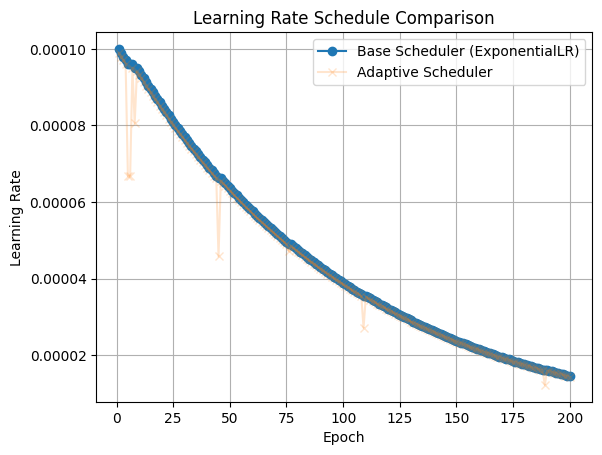

In [65]:
import torch
import math
import matplotlib.pyplot as plt

class AdaptiveLRScheduler:
    def __init__(self, optimizer, base_scheduler, mode='min', factor=0.1, patience=0, warmup_epochs=0, k=2.0, min_lr=1e-6, verbose=False):
        """
        Custom Adaptive LR Scheduler with reward-based learning rate adjustment.

        Args:
            optimizer (torch.optim.Optimizer): Wrapped optimizer.
            base_scheduler (torch.optim.lr_scheduler._LRScheduler): Baseline LR scheduler to combine with.
            mode (str): One of 'min' or 'max'. In 'min' mode, learning rate decreases when the monitored score stops decreasing.
                        In 'max' mode, learning rate decreases when the monitored score stops increasing.
            patience (int): Number of epochs with no improvement after which LR will be reduced. Default: 10.
            warmup_epochs (int): Number of initial epochs to skip LR adjustment. Default: 0.
            k (float): Scaling factor for the reward function. Default: 1.0.
            min_lr (float): Minimum learning rate allowed. Default: 1e-6.
            verbose (bool): If True, prints a message each time LR is reduced.
        """
        self.optimizer = optimizer
        self.base_scheduler = base_scheduler
        self.mode = mode
        self.patience = patience
        self.warmup_epochs = warmup_epochs
        self.k = k
        self.min_lr = min_lr
        self.verbose = verbose

        self.best_score = None
        self.num_bad_epochs = 0
        self.epoch = 0
        self.reward_applied = False
        self.base_lrs = []

    def step(self, current_score):
        """
        Update learning rate based on the current score.

        Args:
            current_score (float): The current value of the metric to monitor.
        """
        self.epoch += 1

        # Warm-up period: Follow base scheduler
        if self.epoch <= self.warmup_epochs:
            if self.verbose:
                print(f"Epoch {self.epoch}: Warm-up period, using base scheduler.")
            self.base_scheduler.step()
            self.base_lrs = [param_group['lr'] for param_group in self.optimizer.param_groups]
            return

        # Initialize best_score
        if self.best_score is None:
            self.best_score = current_score
            self.base_scheduler.step()
            self.base_lrs = [param_group['lr'] for param_group in self.optimizer.param_groups]
            return

        if (self.mode == 'min' and current_score < self.best_score) or \
           (self.mode == 'max' and current_score > self.best_score):
            # Improvement observed
            if not self.reward_applied:
                # Apply reward only if it hasn't been applied in the previous step
                self.reward_applied = True
                reward = math.exp(-self.k * abs(current_score - self.best_score))
                for param_group in self.optimizer.param_groups:
                    new_lr = param_group['lr'] * reward
                    param_group['lr'] = max(new_lr, self.min_lr)

                if self.verbose:
                    print(f"Epoch {self.epoch}: Improvement detected. Reward applied. LR updated to {self.optimizer.param_groups[0]['lr']:.6f}")
            else:
                if self.verbose:
                    print(f"Epoch {self.epoch}: Improvement detected. LR unchanged at {self.optimizer.param_groups[0]['lr']:.6f}")

            self.best_score = current_score
            self.num_bad_epochs = 0
        else:
            # No improvement
            self.reward_applied = False
            self.num_bad_epochs += 1
            if self.num_bad_epochs > self.patience:
                # Revert to base scheduler LR for this epoch
                for param_group, base_lr in zip(self.optimizer.param_groups, self.base_lrs):
                    param_group['lr'] = base_lr
                self.base_scheduler.step()
                self.base_lrs = [param_group['lr'] for param_group in self.optimizer.param_groups]
                self.num_bad_epochs = 0

                if self.verbose:
                    print(f"Epoch {self.epoch}: No improvement for {self.patience} epochs. Base scheduler applied. LR updated to {self.optimizer.param_groups[0]['lr']:.6f}")
            else:
                if self.verbose:
                    print(f"Epoch {self.epoch}: No improvement. LR unchanged at {self.optimizer.param_groups[0]['lr']:.6f}")

    def get_lr(self):
        """
        Get the current learning rate of the optimizer.

        Returns:
            list: List of learning rates for each parameter group.
        """
        return [param_group['lr'] for param_group in self.optimizer.param_groups]


# Example Usage
if __name__ == "__main__":
    # Dummy model and optimizer
    model = torch.nn.Linear(10, 1)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.1e-3)

    # Base scheduler
    base_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.99)

    # Initialize scheduler
    adaptive_scheduler = AdaptiveLRScheduler(optimizer, base_scheduler, mode='max', factor=0.5, patience=0, warmup_epochs=3, k=0.5, verbose=True)

    # Simulate training loop
    val_scores = torch.randn(200)
    adaptive_lrs = []
    base_lrs = []

    for epoch, score in enumerate(val_scores, 1):
        print(f"Epoch {epoch}: Validation Score = {score}")
        # Record base scheduler LR
        base_lrs.append(base_scheduler.get_last_lr()[0])

        # Step adaptive scheduler
        adaptive_scheduler.step(score)
        adaptive_lrs.append(adaptive_scheduler.get_lr()[0])

    # Plot LR changes
    plt.plot(range(1, len(base_lrs) + 1), base_lrs, marker='o', label='Base Scheduler (ExponentialLR)')
    plt.plot(range(1, len(adaptive_lrs) + 1), adaptive_lrs, marker='x', label='Adaptive Scheduler',alpha=0.2)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.title('Learning Rate Schedule Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()
